# Data Wrangling and Analyze Data `WeRateDogs`

## Key Points
Key points to keep in mind when data wrangling for this project:

1. You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

2. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.


3. Cleaning includes merging individual pieces of data according to the rules of tidy data.The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.


4. You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


In [1]:
# load necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## `twitter-archive-enhanced.csv`


### Checklist, before  Assessing & Cleaning

- Missing value
- Incorrect datatype 
- Duplication 

In [2]:
tae = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Missing Value
tae.isna().sum()
# There are a lot of missing value. but it's not meaningful to drop it because those columns are not completely filled with NaN.

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [4]:
#Duplication 
sum(tae.duplicated())
#No duplication 

0

In [5]:
#Incorrect datatype
tae.info()
# There are some incorrect datatype.This part will be demonstrated in Quality-issues of Assessing Part

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## `Assessing` - twitter-archive-enhanced.csv

These are the programmatic assessment methods in pandas that you will probably use most often:

* .head (DataFrame and Series)
* .tail (DataFrame and Series)
* .sample (DataFrame and Series)
* .info (DataFrame only)
* .describe (DataFrame and Series)
* .value_counts (Series only)
* Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)

In [6]:
tae.head()
# 3 rows from the top

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
tae.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
tae.sample()
#sampling randomly of df dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None


In [9]:
tae.shape
#shape of df dataset

(2356, 17)

In [10]:
tae.columns
# columns of df dataset 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
tae.describe()
#statistcal inforamtion 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
tae['rating_numerator'].value_counts().head()
# counting the value of column 'rating_numerator'

12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64

In [13]:
tae['rating_denominator'].value_counts().head()
# counting the value of column 'rating_denominator'

10    2333
11       3
50       3
80       2
20       2
Name: rating_denominator, dtype: int64

In [14]:
#Value count
tae['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

## `Cleaning` - twitter-archive-enhanced.csv

## Quality 
### `tae` table
- `None` is not identifed as a missing value 
- Unnecessary string '+0000' in column called 'timestamp'
- timestampe has wrong datatype 
- display data in the table fully in order to keep it as a invaild and readable data 
- descending twitter id 
- invaild data in colums 'name'

`Define`

**None** is not identifed as a missing value.Change it from None to NaN using replace,dictionary and np.nan.For instance in column **'doggo'**

**Attention** : replace with 'NaN' is working but pandas understand 'NaN' as a kind of string, not missing value !! 

`Code`

In [15]:
value = np.nan
tae=tae.replace({'None':value})

`Test`

In [16]:
tae[tae['doggo'].str.contains('None',na=False)]
# "None" is removed 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
tae.isna().sum()[13:]
# 'NaN' is saved as a missing value not a sort of string data

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

`Define`

Remove unnecessary string '+0000' in column called 'timestamp': use str.strip

`Code`

In [18]:
tae['timestamp']=tae['timestamp'].str.rstrip('+0000')

`Test`

In [19]:
tae['timestamp'].head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

`Define`

timestampe has wrong datatype. Use datetime library 

`Code`

In [20]:
# import datetime library
import datetime
tae['timestamp']=pd.to_datetime(tae['timestamp'])

`Test`

In [21]:
tae['timestamp'].dtype

dtype('<M8[ns]')

`Define`

display data in the table fully in order to keep it as a invaild and readable data 

`Code`

In [22]:
pd.set_option('display.max_colwidth', -1)
# display fully all data in the table

`Test`

In [23]:
tae.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN


`Define`

Twitter_id is descending. change it in "Ascending" 

`Code`

In [24]:
tae=tae.sort_values(by='tweet_id',ascending=True)
# sort "tweet_id' using "Ascending" 
tae = tae.reset_index(drop=True)
# reset index in numeric sequence 

`Test`

In [25]:
tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,NaN,NaN,NaN,NaN
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN,NaN,NaN,NaN
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN,NaN,NaN,NaN
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN,NaN,NaN,NaN
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,NaN,NaN,NaN


`Define`

invaild data in colums 'name'. use replace and dictionary. For example 'a','the','an'

`Code`

In [26]:
tae['name'].value_counts().head(12)
# 'a' is most popular name in the column. 
# I googled and found most common name with start alphabet 'a' : Alexander / Adrian , with start alphabet 't' : Thomas

a          55
Charlie    12
Lucy       11
Cooper     11
Oliver     11
Tucker     10
Penny      10
Lola       10
Bo         9 
Winston    9 
the        8 
Sadie      8 
Name: name, dtype: int64

In [27]:
tae['name'] = tae['name'].replace({'a':'Alexander'})
tae['name'] = tae['name'].replace({'an':'Adrian'})
tae['name'] = tae['name'].replace({'the':'Thomas'})

`Test`

In [28]:
tae[ (tae['name']=='Alexander') | (tae['name']=='Adrian') | (tae['name']=='Thomas') ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,Alexander,NaN,NaN,NaN,NaN
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,Alexander,NaN,NaN,NaN,NaN
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,Alexander,NaN,NaN,NaN,NaN
5,666050758794694657,NaN,NaN,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,Alexander,NaN,NaN,NaN,NaN
6,666051853826850816,NaN,NaN,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,Adrian,NaN,NaN,NaN,NaN
7,666055525042405380,NaN,NaN,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,Alexander,NaN,NaN,NaN,NaN
8,666057090499244032,NaN,NaN,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,Alexander,NaN,NaN,NaN,NaN
9,666058600524156928,NaN,NaN,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,Thomas,NaN,NaN,NaN,NaN
10,666063827256086533,NaN,NaN,2015-11-16 01:22:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,Thomas,NaN,NaN,NaN,NaN
20,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,Adrian,NaN,NaN,NaN

In [29]:
tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,NaN,NaN,NaN,NaN
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,Alexander,NaN,NaN,NaN,NaN
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,Alexander,NaN,NaN,NaN,NaN
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,Alexander,NaN,NaN,NaN,NaN
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,NaN,NaN,NaN


## Tidness
### `tae`table
- Column 'text' contains url for tweet which is basically same as column **"expanded_urls"**
- Arange the columns position to see more cleary for viewers 

`Define`

Column 'text' contains url for tweet which is basically same as column **"expanded_urls"**.extract url from text column and add it in the tae table.Furthermore expanded_url is not necessary.So remove it  

`Code`

In [30]:
# robust regular expression of url (generally)
url=tae['text'].str.extract(r'(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\/([-a-zA-Z0-9()@:%_\+.~#?&//=]*))', expand=True)[0]



# Alternative :using re library 
# Documentation  : https://docs.python.org/3/library/re.html
#import re
#url = [re.findall(r'http.*',x,re.I)[0] for x in tae['text']]

In [31]:
# we add need to add  so that the last element will not get cut off 
tae.text = tae.text + ' '
# check whether all data in text column has 'url with start http' in the end 
print((tae.text.str.contains("http")==False).sum())
# use lambda,strip,apply fuction 
tae.text = tae.text.apply(lambda x : x[:x.find('http')]).str.strip()

70


In [32]:
# change the format to DataFrame
url = pd.DataFrame(data=url)

In [33]:
# merge text in tae column and remmove expanded_urls column 
tae = pd.merge(tae,url, right_index=True, left_index=True)
#remmove unnecessary column "expanded_urls" 
tae=tae.drop(columns=['expanded_urls'])

In [34]:
# rename column '0' to 'url'
tae= tae.rename(columns={0: 'url'})

`Test`

In [35]:
tae.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,NaN,NaN,NaN,8,10,NaN,NaN,NaN,NaN,NaN,https://t.co/BLDqew2Ijj


`Define`

arange the position of column to see more clearly.

`Code`

In [36]:
# arange the position of column  
tae = pd.DataFrame(tae,columns=[  'tweet_id','timestamp', 'source', 'text','url',
      'rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ])

In [37]:
tae.head(1)

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://t.co/BLDqew2Ijj,8,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## `Image-predictions.tsv`

### Checklist, before  Assessing & Cleaning

- Missing value
- Incorrect datatype 
- Duplication 

In [38]:
Image_Prediction = pd.read_csv('image-predictions.tsv',sep='\t')

In [39]:
Image_Prediction.isna().sum()
# Missing value

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [40]:
sum(Image_Prediction.duplicated())
#No duplication 

0

In [41]:
Image_Prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [42]:
Image_Prediction.info()
# correct datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### `Assessing` - Image-predictions.tsv

These are the programmatic assessment methods in pandas that you will probably use most often:

* .head (DataFrame and Series)
* .tail (DataFrame and Series)
* .sample (DataFrame and Series)
* .describe (DataFrame and Series)
* .value_counts (Series only)

In [43]:
Image_Prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [44]:
Image_Prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [45]:
Image_Prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False


In [46]:
Image_Prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [47]:
#demonstrate Value_counts 
Image_Prediction.p2.value_counts().head()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
Name: p2, dtype: int64

In [48]:
#demonstrate Value_counts 
Image_Prediction[Image_Prediction['p1_dog']==True]['p1'].value_counts().head()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
Name: p1, dtype: int64

### Quality 
#### `Image_Prediction` table

- Inconsistent url type (for example : png) 
- cairn is not a kind of dog breed but it's identifed as a dog.
- Wrong name of breed "Leonberg(name of city in Germany) -> Leonberger(dog breed which comes from Leonberg)"

### Tidness 
#### `Image-Prediction` table
- nothing

### `Cleaning` - Image-predictions.tsv

`Define` : wrong name of breed "Leonberg" -> "Leonberger". unse replace fuction and dictionary to change all **Leonberg to Leonberger** 

Google search: https://www.google.com/search?rlz=1C1CHBF_deDE871DE871&sxsrf=ALeKk00ztjYGupDf4rqxGmn25c60ZDlSmg%3A1586858756362&ei=BIuVXu7KFZfg-AbSz5LYDA&q=leonberger&oq=leonberger&gs_lcp=CgZwc3ktYWIQAzIECCMQJzIECAAQQzICCAAyBQgAEMsBMgUIABDLATICCAAyAggAMgIIADIFCAAQywEyAggAOgQIABBHShAIFxIMOC0xOGcxNTJnMTU4SgsIGBIHOC0yZzFnMVCKCljPCmDcDGgAcAJ4AIABhAGIAYYCkgEDMC4ymAEAoAEBqgEHZ3dzLXdpeg&sclient=psy-ab&ved=0ahUKEwju3OzD1efoAhUXMN4KHdKnBMsQ4dUDCAw&uact=5

`Code`

In [49]:
Image_Prediction[Image_Prediction['p1']=='Leonberg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
1846,839239871831150596,https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg,3,Leonberg,0.927021,True,Newfoundland,0.050009,True,Saint_Bernard,0.010728,True


In [50]:
Image_Prediction[Image_Prediction['p2']=='Leonberg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False
727,686377065986265092,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,1,German_shepherd,0.830816,True,Leonberg,0.076325,True,bloodhound,0.037449,True
1073,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True,Leonberg,0.118089,True,bull_mastiff,0.066508,True
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True


In [51]:
Image_Prediction[Image_Prediction['p3']=='Leonberg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1090,719339463458033665,https://pbs.twimg.com/media/Cfuba6NW4AIeMHk.jpg,1,golden_retriever,0.765778,True,borzoi,0.071148,True,Leonberg,0.070371,True
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,Tibetan_mastiff,0.915790,True,German_shepherd,0.062480,True,Leonberg,0.008297,True
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
1666,812709060537683968,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1,Irish_setter,0.326873,True,golden_retriever,0.182610,True,Leonberg,0.156912,True
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True


In [52]:
Image_Prediction=Image_Prediction.replace({'Leonberg':'Leonberger'})

`Test`

In [53]:
Image_Prediction[Image_Prediction['p3']=='Leonberg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [54]:
Image_Prediction[Image_Prediction['p2']=='Leonberg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [55]:
Image_Prediction[Image_Prediction['p1']=='Leonberg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


`Define`

cairn is not a kind of dog breed but it's identifed as a dog.Actually cairn is a short name of **cairn terrier which is a dog breed**.But someone who has no idea about dog breed search it in google and just find **a mound of rough stones built as a memorial or landmark, typically on a hilltop or skyline.**. This is inconsistent becuase there are a lot of breed of terrier in this datset. And these data are written with in the end "terrier". So we gonna replace **from cairn to cairn terrier**

`Code`

In [56]:
Image_Prediction.query('p1=="cairn"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
891,699370870310113280,https://pbs.twimg.com/media/CbSqE0rVIAEOPE4.jpg,1,cairn,0.337557,True,Chihuahua,0.209130,True,Border_terrier,0.136946,True
1749,823699002998870016,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1,cairn,0.203999,True,snorkel,0.171893,False,Norfolk_terrier,0.107543,True


In [57]:
Image_Prediction.query('p2=="cairn"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich_terrier,0.419838,True,cairn,0.351876,True,Norfolk_terrier,0.051094,True
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
1496,783391753726550016,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,Norwegian_elkhound,0.877130,True,cairn,0.086241,True,keeshond,0.011019,True
1595,798925684722855936,https://pbs.twimg.com/media/CxZaqh_WQAA7lY3.jpg,1,West_Highland_white_terrier,0.539463,True,cairn,0.184897,True,Norfolk_terrier,0.163024,True


In [58]:
Image_Prediction.query('p3=="cairn"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,West_Highland_white_terrier,0.946828,True,miniature_schnauzer,0.022344,True,cairn,0.009462,True
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,keeshond,0.994065,True,Norwegian_elkhound,0.001827,True,cairn,0.001821,True
769,689283819090870273,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,1,Scotch_terrier,0.267979,True,affenpinscher,0.199619,True,cairn,0.127469,True
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
1084,718540630683709445,https://pbs.twimg.com/media/CfjE5FRXEAErFWR.jpg,2,Maltese_dog,0.632289,True,West_Highland_white_terrier,0.187055,True,cairn,0.044413,True


In [59]:
Image_Prediction=Image_Prediction.replace({'cairn':'cairn_terrier'})

`Test`

In [60]:
Image_Prediction.query('p1=="cairn"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [61]:
Image_Prediction.query('p2=="cairn"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [62]:
Image_Prediction.query('p3=="cairn"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


`Define`

There are a few jpg_urls, which are too long. Therefore these urls are not shown completely and invaild. So We gonna extend the block of html link. 

`Code`

In [63]:
pd.set_option('display.max_colwidth', -1)
# display full not only url information but also full dataframe

In [64]:
Image_Prediction['jpg_url']
# Common features of invaild urls : included 'ext_tw_video_thumb' 
# But now those are shown completely (example : index 2050,2052,2059)

0       https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg                                        
1       https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg                                        
2       https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg                                        
3       https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg                                        
4       https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg                                        
5       https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg                                        
6       https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg                                        
7       https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg                                        
8       https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                        
9       https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg                                        
10      https://pbs.twimg.com/media/CT5V

`Define`

inconsistent url typ **(not jpg)**

`Code`

In [65]:
#find not jpg urls 
url = np.array(Image_Prediction['jpg_url'])
list = []
for item in url : 
    if '.jpg' not in item:
        list.append(item)
        
print(list)

['https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png', 'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png']


In [66]:
Image_Prediction['jpg_url']=Image_Prediction['jpg_url'].replace({'https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png'
                                                                 :'https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.jpg'})
                                                              

In [67]:
Image_Prediction['jpg_url']=Image_Prediction['jpg_url'].replace({'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png'
                                                                 :'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.jpg'})

`Test`

In [68]:
Image_Prediction[Image_Prediction['jpg_url']=='https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [69]:
Image_Prediction[Image_Prediction['jpg_url']=='https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## `twitter_api.csv`
This data comes originally from `tweet-json.txt`

### Checklist, before  Assessing & Cleaning
- Missing value
- Incorrect datatype
- Duplication

In [70]:
twitter_api = pd.read_csv('twitter_api.csv')

In [71]:
# No Missing value
twitter_api.isna().sum()

Unnamed: 0        0
tweet_ID          0
retweet_count     0
favorite_count    0
dtype: int64

In [72]:
# No Duplication 
sum(twitter_api.duplicated())

0

In [73]:
# Incorrect datatyp
twitter_api.info()
# correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
Unnamed: 0        2354 non-null int64
tweet_ID          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


### `Assessing` - twitter_api.csv

These are the programmatic assessment methods in pandas that you will probably use most often:

* .head (DataFrame and Series)
* .tail (DataFrame and Series)
* .sample (DataFrame and Series)
* .describe (DataFrame and Series)
* .value_counts (Series only)

In [74]:
twitter_api.head()

,Unnamed: 0,tweet_ID,retweet_count,favorite_count
0,0,892420643555336193,8853,39467
1,1,892177421306343426,6514,33819
2,2,891815181378084864,4328,25461
3,3,891689557279858688,8964,42908
4,4,891327558926688256,9774,41048


In [75]:
twitter_api.tail()

,Unnamed: 0,tweet_ID,retweet_count,favorite_count
2349,2349,666049248165822465,41,111
2350,2350,666044226329800704,147,311
2351,2351,666033412701032449,47,128
2352,2352,666029285002620928,48,132
2353,2353,666020888022790149,532,2535


In [76]:
twitter_api.sample()

,Unnamed: 0,tweet_ID,retweet_count,favorite_count
1503,1503,691793053716221953,4732,8910


In [77]:
twitter_api.describe()

,Unnamed: 0,tweet_ID,retweet_count,favorite_count
count,2354.000000,2.354000e+03,2354.000000,2354.000000
mean,1176.500000,7.426978e+17,3164.797366,8080.968564
std,679.685589,6.852812e+16,5284.770364,11814.771334
min,0.000000,6.660209e+17,0.000000,0.000000
25%,588.250000,6.783975e+17,624.500000,1415.000000
50%,1176.500000,7.194596e+17,1473.500000,3603.500000
75%,1764.750000,7.993058e+17,3652.000000,10122.250000
max,2353.000000,8.924206e+17,79515.000000,132810.000000


In [78]:
# value_counts() method is not necessary, because all data are numeric. 

### Quality 
#### `Twitter_api` table
- unnecessary column: 'Unnamed: 0'


### `Cleaning` - twitter_api.csv

`Define`: There is a unnecessary column in the table. This colum shows index of each row.But it existed already.Furthermore change the name of tweet_ID(because of consistency with other files) 

`Code`

In [79]:
twitter_api = twitter_api.drop(columns=['Unnamed: 0'])
twitter_api = twitter_api.rename(columns={'tweet_ID':'tweet_id'})

`Test`

In [80]:
twitter_api.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Tidness 
#### `Twitter_api` table
- merge Image_prediction files with twitter_api.Because there are a lot of tweet_ids,which are intersect each other). 

`Define` 
Merge Image_prediction and twitter_api. 

`Code`

In [81]:
twitter_archive_master2=pd.merge(twitter_api,Image_Prediction,on='tweet_id')

`Tset`

In [82]:
twitter_archive_master2.head()

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Save files 

In [83]:
tae.to_csv('twitter_archive_master.csv')

In [84]:
twitter_archive_master2.to_csv('twitter_archive_master2.csv')

## Visualization 

In [85]:
df = pd.read_csv('twitter_archive_master2.csv')

In [86]:
df = df.drop(columns='Unnamed: 0');df.head()

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


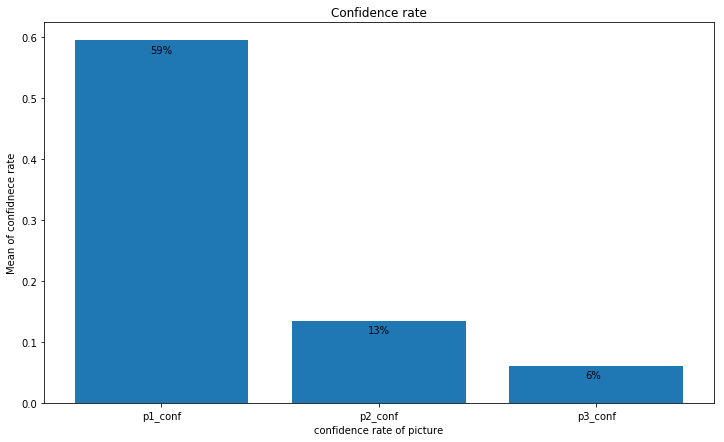

In [87]:
#Compare confidence rate of p1.p2.p3

list = [df.p1_conf.mean(),df.p2_conf.mean(),df.p3_conf.mean()]
plt.subplots(figsize=(12,7))
ax=plt.bar(height=list,x=['p1_conf','p2_conf','p3_conf'])
plt.xlabel('confidence rate of picture')
plt.ylabel('Mean of confidnece rate')
plt.title('Confidence rate');

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.0%}'.format(height), (x+0.35, y-0.02 + height-0.01 + 0.01))
    # arange the position of annotation 

In [88]:
df2 = pd.read_csv('twitter_archive_master.csv')
df2 = df2.drop(columns='Unnamed: 0')

In [89]:
df2['Hour'] = pd.to_datetime(df2['timestamp']).dt.hour
df2['Minute'] = pd.to_datetime(df2['timestamp']).dt.minute
df2['Second'] = pd.to_datetime(df2['timestamp']).dt.second
df2['Count'] = 1
df2.head(1)

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,Hour,Minute,Second,Count
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://t.co/BLDqew2Ijj,8,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22,32,8,1


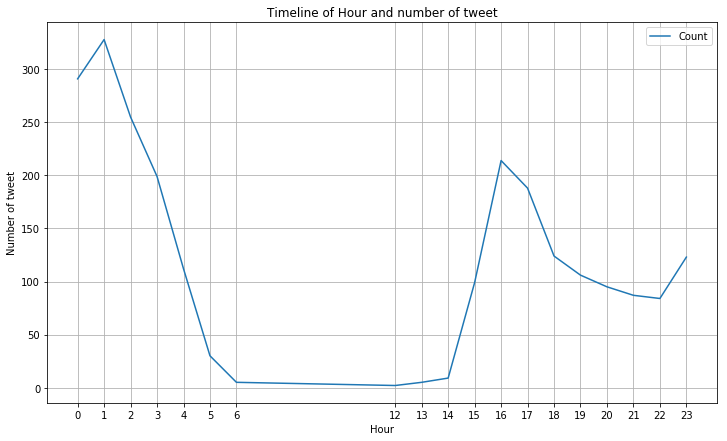

In [90]:
keys = [pair for pair, df in df2.groupby(['Hour'])]
plt.subplots(figsize=(12,7))
plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xlabel('Hour')
plt.ylabel('Number of tweet')
plt.xticks(keys)
plt.title('Timeline of Hour and number of tweet')
plt.legend()
plt.grid()
plt.show()

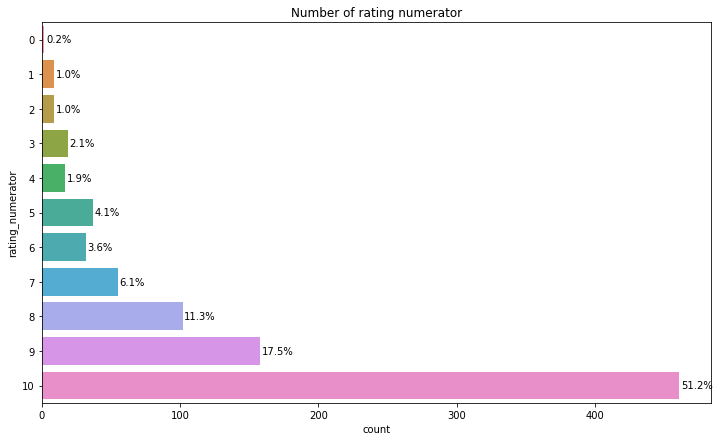

In [91]:
plt.subplots(figsize=(12,7))
under_10 = df2.query('rating_numerator<=10')
rating_numerator_counts = under_10.rating_numerator.value_counts()
rating_numerator_counts=rating_numerator_counts.sort_index(ascending=False)

ax=sns.countplot(data=under_10,y='rating_numerator')
plt.title('Number of rating numerator');


for i in range(rating_numerator_counts.shape[0]):
    count = rating_numerator_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/under_10.shape[0])
    plt.text(count+1,i,pct_string,va='center')
    # count+1,i is coordination of (x,y)

## Insights 

`1.` p1 shows higher possibility of confidene rate than p2 and p3 noticeably.Also the percentag of p2's confidence rate is two times heiger than p3. 


`2` There is no tweet data between 7 to 11 o'clock. I'm going to guess that generally people are at work and they just focus more on their work After lunch time they start to do twitter as usual and the more the time close to get off work the higher the number of active user.


`3` Rating system is very generous.Over 50% of pictures got perfect score.Notice we are handling only rating result with maximum point 10